# Project insights: 

**Rate Description**
Note: Megaline rounds seconds to minutes and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted only one second, it will count as a minute. For web traffic, individual web sessions are not rounded up. Instead, the monthly total is rounded up. If someone uses 1025 megabytes this month, they will be charged 2 gigabytes.

Below is a description of the rates:

`Surf`

Monthly payment: $20.
500 minutes per month, 50 SMS, and 15 GB of data.
If package limits are exceeded:
1 minute: 3 cents.
1 SMS: 3 cents.
1 GB of data: $10.

`Ultimate`

Monthly payment: $70.
3,000 minutes per month, 1,000 SMS, and 30 GB of data.
If the package limits are exceeded:
1 minute: 1 cent.
1 SMS: 1 cent.
1 GB of data: $7.


**Data Dictionary:**
In this project, you will work with five different tables.

`The users table (data about users):`

user_id: Unique identifier of the user.
first_name: First name of the user.
last_name: Last name of the user.
age: Age of the user (in years).
reg_date: Subscription date (dd, mm, yy).
churn_date: Date the user stopped using the service (if the value is missing, the plan was in use when this database was extracted).
city: User's city of residence.
plan: Plan name.

`The calls table (data about calls):`

id: Unique identifier of the call.
call_date: Date of the call.
duration: Call duration (in minutes).
user_id: The identifier of the user making the call.

`The messages table (SMS data):`

id: The unique identifier of the SMS.
message_date: The date of the SMS.
user_id: The identifier of the user sending the SMS.

`The internet table (web session data):`

id: The unique identifier of the session.
mb_used: The amount of data used during the session (in megabytes).
session_date: The date of the web session.
user_id: The user identifier.

`The plans table (tariff data):`

plan_name: Tariff name.
usd_monthly_fee: Monthly payment in US dollars.
minutes_included: Minutes included per month.
messages_included: SMS included per month.
mb_per_month_included: Data included per month (in megabytes).
usd_per_minute: Price per minute after exceeding the package limits (for example, if the package includes 100 minutes, the operator will charge for the 101st minute).
usd_per_message: Price per SMS after exceeding the package limits.
usd_per_gb: Price per gigabyte of extra data after exceeding the package limits (1 GB = 1024 megabytes).

# Development. 

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import statistics as stat

In [2]:

calls= pd.read_csv('/Users/pauli/Documents/Data/megaline_project/megaline_calls.csv')
internet= pd.read_csv('/Users/pauli/Documents/Data/megaline_project/megaline_internet.csv')
messages= pd.read_csv('/Users/pauli/Documents/Data/megaline_project/megaline_messages.csv')
plans= pd.read_csv('/Users/pauli/Documents/Data/megaline_project/megaline_plans.csv')
users= pd.read_csv('/Users/pauli/Documents/Data/megaline_project/megaline_users.csv')

## Data prep:

## Rates

In [3]:
#Print general/summary information about the DataFrame of the rates:
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Sample

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The table contains two rows with information on plans and rates. There are no missing or duplicate values. The data types are float, integer, and string respectively. No errors were observed that need to be corrected. 

## Users

In [5]:
#Print general/summary information about the users DataFrame:

users.info()

users.duplicated().sum()

users.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [6]:
# Sample

users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


The data types are correct, except for reg_date, which should be converted to a date/time format. There are also missing values in the churn_date column, as many users' plans have not yet ended. The missing data will be replaced with 'Active plan'.

### Correct the Data

In [7]:
users['churn_date'].fillna('Active plan', inplace= True)

print (users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan   churn_date  
0  2018-12-24  ultimate  Active plan  
1  2018-08-13      surf  Activ

/var/folders/cq/bs731p7n52x64481gqr1xjvm0000gn/T/ipykernel_56577/667390051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['churn_date'].fillna('Active plan', inplace= True)


### Enrich data

In [8]:
users['reg_date']= pd.to_datetime (users['reg_date'], format= '%Y-%m-%d')

users.info()

#users['churn_date']= pd.to_datetime (users['churn_date'], format= '%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Calls 

In [9]:
# Print general/summary information about the calls DataFrame:

calls.info()

calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [10]:
# Sample

(calls.head(10))
()
(calls['id'].duplicated().sum())

0

In [11]:
#Check calls of duracion '0':

(calls['duration']== 0).sum()
calls = calls[calls['duration'] != 0]


(calls['duration']== 0).sum()

0

The data types seem correct, except for the call date, which will be converted to datetime. There will be many duplicates in user_id because individual calls from each user are shown. The important thing is that there are no duplicates in id, as it is the unique identifier for each call, and after verification, there are no duplicates. 

The call durations should be rounded up to the nearest whole number, as the statement mentions that even one second counts as one minute for billing. There are no missing values in this DataFrame. The describe method is also useful for confirming this, as it shows the count of all columns is the same.

**There are 26,834 calls with a duration of 0. This could be due to the service not being used at that time, or the call was cut off prematurely. These values will be removed to clean the DataFrame, as they do not affect the call information in this case.**



### Correct the data

In [12]:
calls['call_date']= pd.to_datetime (calls['call_date'], format= '%Y-%m-%d')

calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

In [13]:
calls['duration']= calls['duration'].apply(np.ceil)

In [14]:
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


In [15]:
calls['months']= calls['call_date'].dt.month

## Messages 

In [16]:
# Print general/summary information about the messages DataFrame:

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Sample

print (messages.head(10))
print ()
print (messages['id'].duplicated().sum())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28

0


In this case, it is the same as with the calls DataFrame: there are no duplicate IDs, and the data types are correct, except for the date.

### Correct data

In [18]:
messages['message_date']= pd.to_datetime (messages['message_date'], format= '%Y-%m-%d')

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

In [19]:
messages['months']= messages['message_date'].dt.month

## Internet

In [20]:
# Print general/summary information about the internet DataFrame:

internet.info()

internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [21]:
# Sample

print (internet.head(10))
print ()

print (internet['id'].duplicated().sum())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92

0


In addition to the date format, the prompt mentions rounding the MB consumed, but this will be done once the data is in monthly format, so I will do that later in the project. The count in the numerical variables is the same, so we can conclude that there are no missing values in this aspect.

### Correct data

In [22]:
internet['session_date']= pd.to_datetime (internet['session_date'], format= '%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

In [23]:
internet['months']= internet['session_date'].dt.month

## Print the rate conditions and ensure they are clear:

In [24]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Add Data by User

In [25]:
# Calculate the number of calls made by each user per month.


calls_user_month= calls.groupby(['user_id','months'])['id'].count()

calls_user_month.head(10)


user_id  months
1000     12         16
1001     8          22
         9          38
         10         47
         11         49
         12         46
1002     10          8
         11         48
         12         38
1003     12        118
Name: id, dtype: int64

In [26]:
# Calculate the number of minutes used by each user per month
minutes_user_month= calls.groupby(['user_id','months'])['duration'].sum()

minutes_user_month.head(10)


user_id  months
1000     12         124.0
1001     8          182.0
         9          315.0
         10         393.0
         11         426.0
         12         412.0
1002     10          59.0
         11         386.0
         12         384.0
1003     12        1104.0
Name: duration, dtype: float64

In [27]:
# Calculate the number of messages sent by each user per month.

messages_per_month= messages.groupby(['user_id','months'])['id'].count()

messages_per_month.head(10)

user_id  months
1000     12        11
1001     8         30
         9         44
         10        53
         11        36
         12        44
1002     10        15
         11        32
         12        41
1003     12        50
Name: id, dtype: int64

In [28]:
# Calculate the volume of internet traffic used by each user per month.

internet_per_month= internet.groupby(['user_id','months'])['mb_used'].sum()

print (internet_per_month.head(10))

user_id  months
1000     12         1901.47
1001     8          6919.15
         9         13314.82
         10        22330.49
         11        18504.30
         12        19369.18
1002     10         6552.01
         11        19345.08
         12        14396.24
1003     12        27044.14
Name: mb_used, dtype: float64


In [29]:
# Merge the data of calls, minutes, messages, and internet based on user_id and month.

df_merged_first= pd.merge(calls_user_month, minutes_user_month, on=['user_id', 'months'], how='outer')

df_merged_second= pd.merge(df_merged_first, messages_per_month, on=['user_id', 'months'], how='outer',)

df_merged= pd.merge(df_merged_second, internet_per_month,on=['user_id', 'months'], how= 'outer')

df_merged= df_merged.rename(columns= {'id_x': 'number_of_calls', 'duration': 'minutes', 'id_y': 'number_of_messages'})

print (df_merged.head(10))



                number_of_calls  minutes  number_of_messages   mb_used
user_id months                                                        
1000    12                 16.0    124.0                11.0   1901.47
1001    8                  22.0    182.0                30.0   6919.15
        9                  38.0    315.0                44.0  13314.82
        10                 47.0    393.0                53.0  22330.49
        11                 49.0    426.0                36.0  18504.30
        12                 46.0    412.0                44.0  19369.18
1002    10                  8.0     59.0                15.0   6552.01
        11                 48.0    386.0                32.0  19345.08
        12                 38.0    384.0                41.0  14396.24
1003    12                118.0   1104.0                50.0  27044.14


In [30]:
# Add the rate information.

df_merged_users= pd.merge(df_merged, users, on= 'user_id', how= 'outer')

df_merged_users['mb_used']= (df_merged_users['mb_used']/1024).apply(np.ceil)

df_merged_users= df_merged_users.rename(columns= {'mb_used': 'gb_used'})

plans= plans.rename(columns= {'plan_name': 'plan'})

df_merged_plans= pd.merge(df_merged_users, plans, on= 'plan', how= 'outer')

df_merged_plans['mb_per_month_included']= df_merged_plans['mb_per_month_included']/1024

df_merged_plans= df_merged_plans.rename(columns= {'mb_per_month_included': 'gb_per_month_included'})
df_merged_plans.fillna(0, inplace=True)

df_merged_plans.head()

,user_id,number_of_calls,minutes,number_of_messages,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1001,22.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active plan,50,15.0,500,20,10,0.03,0.03
1,1001,38.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active plan,50,15.0,500,20,10,0.03,0.03
2,1001,47.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active plan,50,15.0,500,20,10,0.03,0.03
3,1001,49.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active plan,50,15.0,500,20,10,0.03,0.03
4,1001,46.0,412.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active plan,50,15.0,500,20,10,0.03,0.03


In [31]:
# Calculate the monthly income for each user.

df_merged_plans['total_minutos'] = (df_merged_plans['minutes'] - df_merged_plans['minutes_included'])* df_merged_plans['usd_per_minute']
df_merged_plans['total_minutos'] = df_merged_plans['total_minutos'].apply(lambda x: max(0, x))


df_merged_plans['total_mensajes']= (df_merged_plans['number_of_messages'] -df_merged_plans['messages_included']) * df_merged_plans['usd_per_message']
df_merged_plans['total_mensajes'] = df_merged_plans['total_mensajes'].apply(lambda x: max(0, x))

df_merged_plans['total_datos']= (df_merged_plans['gb_used'] - df_merged_plans['gb_per_month_included'])* df_merged_plans['usd_per_gb']
df_merged_plans['total_datos'] = df_merged_plans['total_datos'].apply(lambda x: max(0, x))


df_merged_plans['ingreso_mensual']= df_merged_plans['total_minutos'] + df_merged_plans['total_mensajes'] + df_merged_plans['total_datos'] + df_merged_plans['usd_monthly_pay']

df_merged_plans.head()


,user_id,number_of_calls,minutes,number_of_messages,gb_used,first_name,last_name,age,city,reg_date,...,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_minutos,total_mensajes,total_datos,ingreso_mensual
0,1001,22.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15.0,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
1,1001,38.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15.0,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
2,1001,47.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15.0,500,20,10,0.03,0.03,0.0,0.09,70.0,90.09
3,1001,49.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15.0,500,20,10,0.03,0.03,0.0,0.00,40.0,60.00
4,1001,46.0,412.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15.0,500,20,10,0.03,0.03,0.0,0.00,40.0,60.00


**To calculate the monthly income for each user, we first total the consumption by category. Once this is done, we compare it with what is already included in the plan. If the user exceeds the included consumption, the corresponding fee is added. If not, the original plan value is maintained. The sum of all this for each user is the total monthly income calculation.**

## Study User Behavior

### Calls

<Axes: title={'center': 'Duracion de llamadas promedio.'}, xlabel='Mes', ylabel='Minutos de duración'>

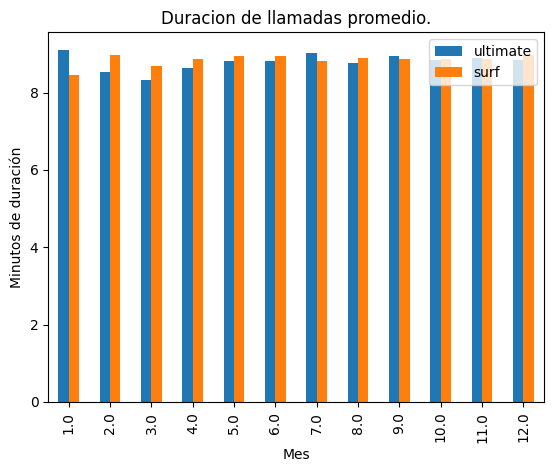

In [32]:
# Compare the average call duration for each plan and month.
df_calls_plan= pd.merge(df_merged_plans, calls, on='user_id', how='outer')

llamadas_ultimate= df_calls_plan[df_calls_plan['plan']== 'ultimate'].groupby('months')['duration'].mean()
llamadas_surf= df_calls_plan[df_calls_plan['plan']== 'surf'].groupby('months')['duration'].mean()

duracion_promedio= pd.concat([llamadas_ultimate, llamadas_surf], axis= 1)
duracion_promedio.columns= ['ultimate', 'surf']


duracion_promedio.plot(kind='bar', title='Duracion de llamadas promedio.', xlabel= 'Mes', ylabel= 'Minutos de duración')


<Axes: title={'center': 'Minutos usados por plan'}, ylabel='Frequency'>

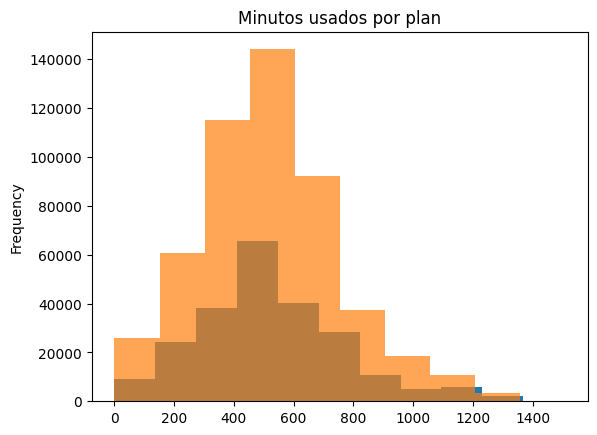

In [33]:
# CCompare the number of monthly minutes used by users of each plan. Plot a histogram.
plan_ultimate= df_calls_plan[df_calls_plan['plan']== 'ultimate']
plan_surf= df_calls_plan[df_calls_plan['plan']== 'surf']

plan_ultimate['minutes'].plot(kind= 'hist', title='Minutos usados por plan')
plan_surf['minutes'].plot(kind= 'hist', alpha=0.7)

# Minutes is the column with the total per user

In [34]:

mean_calls_ultimate= np.mean(plan_ultimate['minutes'])
var_calls_ultimate = np.var(plan_ultimate['minutes'])
median_calls_ultimate= stat.median(plan_ultimate['minutes'])
mode_calls_ultimate= stat.mode(plan_ultimate['minutes'])
dev_calls_ultimate= np.sqrt(var_calls_ultimate)

mean_calls_surf= np.mean(plan_surf['minutes'])
var_calls_surf= np.var(plan_surf['minutes'])
median_calls_surf= stat.median(plan_surf ['minutes'])
mode_calls_surf= stat.mode(plan_surf['minutes'])
dev_calls_surf= np.sqrt(var_calls_surf)

print (mean_calls_ultimate, var_calls_ultimate,median_calls_ultimate,mode_calls_ultimate,dev_calls_ultimate )
print (mean_calls_surf, var_calls_surf, median_calls_surf,mode_calls_surf, dev_calls_surf )

522.6579441860059 61834.885543943936 499.0 734.0 248.66621311296782
518.1519850226997 56615.47377799131 502.0 626.0 237.94006341511997


In [35]:
(plan_ultimate['minutes']).describe()

count    229369.000000
mean        522.657944
std         248.666755
min           0.000000
25%         365.000000
50%         499.000000
75%         655.000000
max        1369.000000
Name: minutes, dtype: float64

<Axes: ylabel='minutes'>

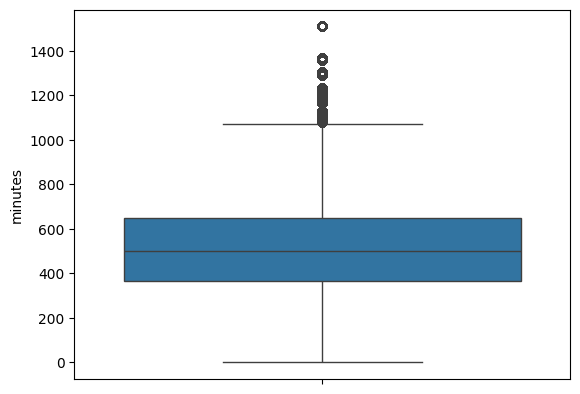

In [36]:
#Plot a box plot to visualize the distribution of the monthly call duration.
sns.boxplot(df_calls_plan['minutes'])

**The average call duration for each plan shows no significant variation. In the histogram, we can observe a positive skew, as most of the values are toward the right, and Surf plan users make more use of the total minutes available in their plan compared to Ultimate plan users. The highest concentration of data is between 400 and 600 minutes, which is confirmed by the calculated average of around 500 minutes. The median is 499 and 502, respectively, which indicates that there are no outliers skewing the average, as these values are close. We can complement this analysis by noting that the most common values are 734 and 626 minutes for each plan, which makes sense as the standard deviation is around 240, indicating the variation from the mean.

Looking at the box plot, the position of the median suggests that around 50% of users made at least 500 calls per month. The whisker on the right indicates that most users made a maximum of 1000 calls, with outliers going up to 1200 calls.

Based on the graphs, the user behavior for both plans seems quite similar, as the duration and quantity of calls are comparable**

### Messages

<Axes: title={'center': ' Mensajes usados por mes/plan'}, xlabel='months', ylabel='Numero de mensajes'>

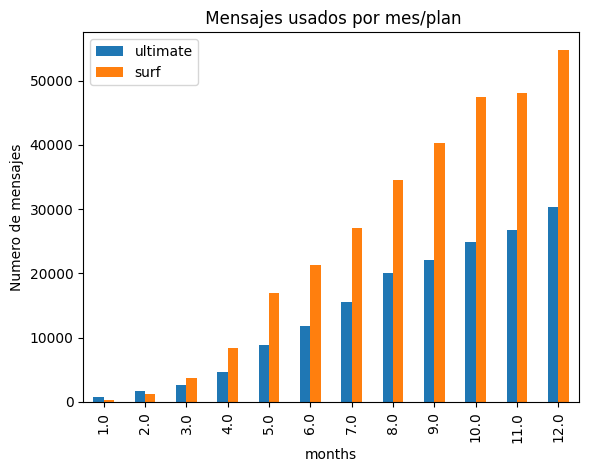

In [37]:
# Compare the number of messages sent each month by users of each plan

df_messages_plan= pd.merge(df_merged_plans, messages, on='user_id', how='outer')

messages_ultimate= df_messages_plan[df_messages_plan['plan']== 'ultimate'].groupby('months')['number_of_messages'].count()
messages_surf= df_messages_plan[df_messages_plan['plan']== 'surf'].groupby('months')['number_of_messages'].count()

messages_per_month= pd.concat([messages_ultimate, messages_surf], axis= 1)
messages_per_month.columns= ['ultimate', 'surf']


messages_per_month.plot(kind='bar', title=' Mensajes usados por mes/plan', ylabel= 'Numero de mensajes')


<Axes: title={'center': 'Mensajes usados por plan'}, ylabel='Frequency'>

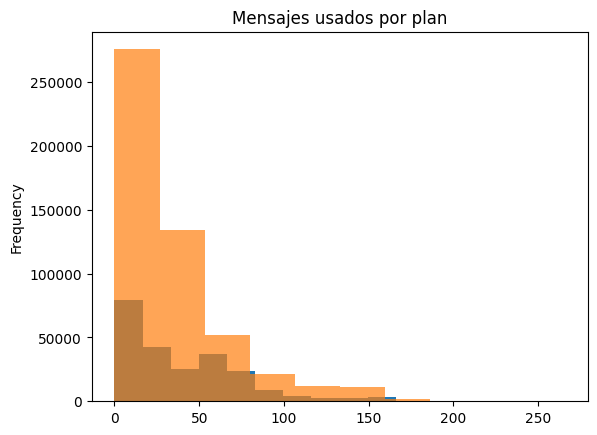

In [38]:
plan_ultimate['number_of_messages'].plot(kind= 'hist', title='Mensajes usados por plan')
plan_surf['number_of_messages'].plot(kind= 'hist', alpha=0.7)


38.36824941469859 1256.2142173226039 30.0 0.0 35.44311241020748
31.50111092121005 1223.8450969633266 23.0 0.0 34.983497494723515


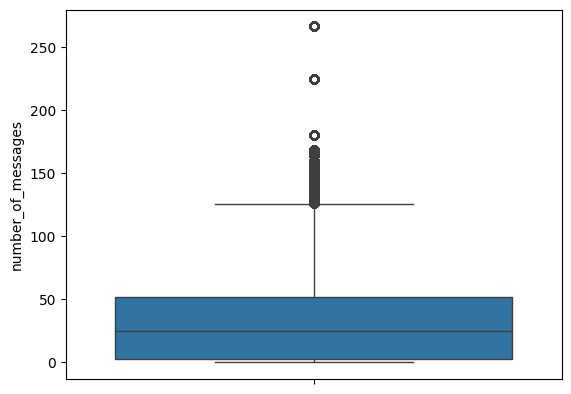

In [39]:
sns.boxplot(df_calls_plan['number_of_messages'])

mean_messages_ultimate= np.mean(plan_ultimate['number_of_messages'])
var_messages_ultimate = np.var(plan_ultimate['number_of_messages'])
median_messages_ultimate= stat.median(plan_ultimate['number_of_messages'])
mode_messages_ultimate= stat.mode(plan_ultimate['number_of_messages'])
dev_messages_ultimate= np.sqrt(var_messages_ultimate)

mean_messages_surf= np.mean(plan_surf['number_of_messages'])
var_messages_surf= np.var(plan_surf['number_of_messages'])
median_messages_surf= stat.median(plan_surf['number_of_messages'])
mode_messages_surf= stat.mode(plan_surf['number_of_messages'])
dev_messages_surf= np.sqrt(var_messages_surf)


print (mean_messages_ultimate, var_messages_ultimate, median_messages_ultimate, mode_messages_ultimate, dev_messages_ultimate)
print (mean_messages_surf, var_messages_surf, median_messages_surf, mode_messages_surf, dev_messages_surf)

Regarding messages, Surf plan users show a significant difference compared to the Ultimate plan, with much higher usage and increasing monthly.
Both plans appear to have a similar distribution, with most users sending between 0 and 50 messages per month, with the difference that the frequency of those on the Surf plan is much higher. In both cases, most users send few messages, with a clear tendency to decrease as the number of messages sent increases. This data is also corroborated in the box plot, where outliers begin around 125 messages. The statistical data for both plans also behave similarly.
In the case of the mode, the most frequently repeated number is 0.0; this is because we replaced users who do not send messages with 0.

### Internet

<Axes: title={'center': 'GB Usados por mes/plan'}, xlabel='months'>

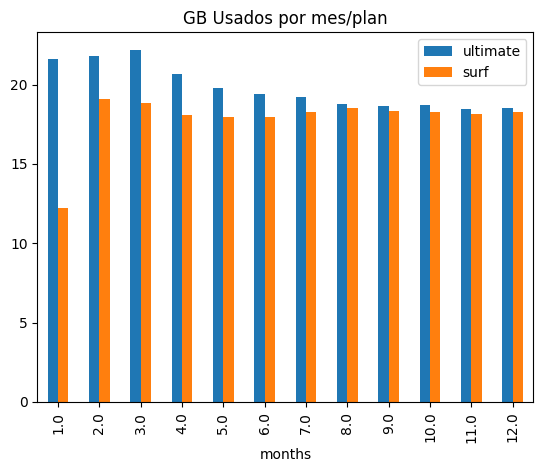

In [40]:
# Compare the internet usage by users of each plan.
df_internet_plan= pd.merge(df_merged_plans, internet, on='user_id', how='outer')

internet_ultimate= df_internet_plan[df_internet_plan['plan']== 'ultimate'].groupby('months')['gb_used'].mean()
internet_surf= df_internet_plan[df_internet_plan['plan']== 'surf'].groupby('months')['gb_used'].mean()

internet_per_month= pd.concat([internet_ultimate, internet_surf], axis= 1)
internet_per_month.columns= ['ultimate', 'surf']


internet_per_month.plot(kind='bar', title= 'GB Usados por mes/plan')

<Axes: title={'center': 'Internet usado por plan'}, ylabel='Frequency'>

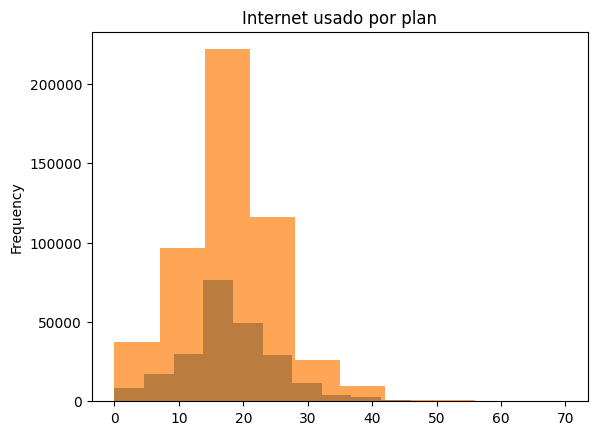

In [41]:
plan_ultimate['gb_used'].plot(kind= 'hist', title='Internet usado por plan')
plan_surf['gb_used'].plot(kind= 'hist', alpha=0.7)

17.75749556391666 49.40957224274538 17.0 17.0 7.0291942811922175
17.32211803857087 55.359096303809466 17.0 18.0 7.440369366087242


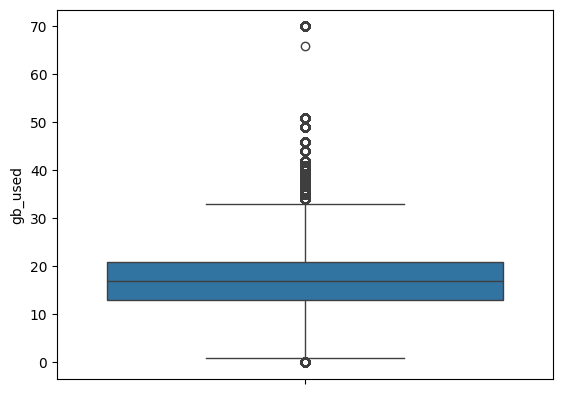

In [42]:
sns.boxplot(df_calls_plan['gb_used'])
mean_internet_ultimate= np.mean(plan_ultimate['gb_used'])
var_internet_ultimate = np.var(plan_ultimate['gb_used'])
median_internet_ultimate= stat.median(plan_ultimate['gb_used'])
mode_internet_ultimate= stat.mode(plan_ultimate['gb_used'])
dev_internet_ultimate= np.sqrt(var_internet_ultimate)

mean_internet_surf= np.mean(plan_surf['gb_used'])
var_internet_surf= np.var(plan_surf['gb_used'])
median_internet_surf= stat.median(plan_surf['gb_used'])
mode_internet_surf= stat.mode(plan_surf['gb_used'])
dev_internet_surf= np.sqrt(var_internet_surf)


print (mean_internet_ultimate, var_internet_ultimate, median_internet_ultimate, mode_internet_ultimate, dev_internet_ultimate)
print (mean_internet_surf, var_internet_surf,median_internet_surf, mode_internet_surf,dev_internet_surf )

Ultimate plan users appear to use the internet more, with a not very noticeable difference, except for the first month of the year, where there is a difference. This difference narrows as the months go by.
Surfing users' usage frequency is higher than that of Ultimate users; this can be explained by the fact that the data is grouped differently.
Most users use between 15 and 20 GB per month, with a median of approximately 17 GB. Minimum values ​​are 0 for non-internet users, with outliers ranging from just over 30 to 70 GB.

In this case, the median, mode, and mean are practically the same, confirming the reliability of this data and its use for necessary marketing analyses.

## Income calculation

<Axes: title={'center': 'Monthly Income'}, xlabel='months'>

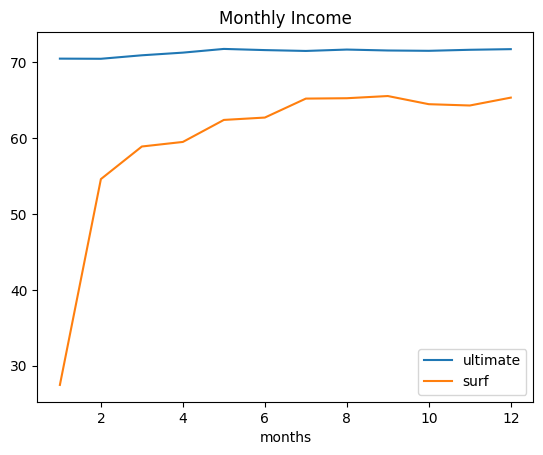

In [43]:
revenue_ultimate= df_calls_plan[df_calls_plan['plan']== 'ultimate'].groupby('months')['ingreso_mensual'].mean()
revenue_surf= df_calls_plan[df_calls_plan['plan']== 'surf'].groupby('months')['ingreso_mensual'].mean()

revenue_per_month= pd.concat([revenue_ultimate, revenue_surf], axis= 1)
revenue_per_month.columns= ['ultimate', 'surf']


revenue_per_month.plot(kind='line', title= 'Monthly Income')

<Axes: title={'center': 'Monthly Income per plan'}, ylabel='Frequency'>

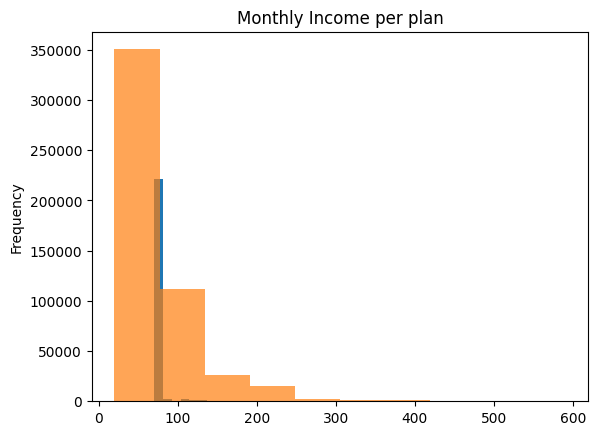

In [44]:
plan_ultimate['ingreso_mensual'].plot(kind= 'hist', title='Monthly Income per plan')
plan_surf['ingreso_mensual'].plot(kind= 'hist', alpha=0.7)

71.55412457655568 76.9450898784473 70.0 70.0 8.771835034840048
64.20321277235252 55.359096303809466 17.0 7.440369366087242


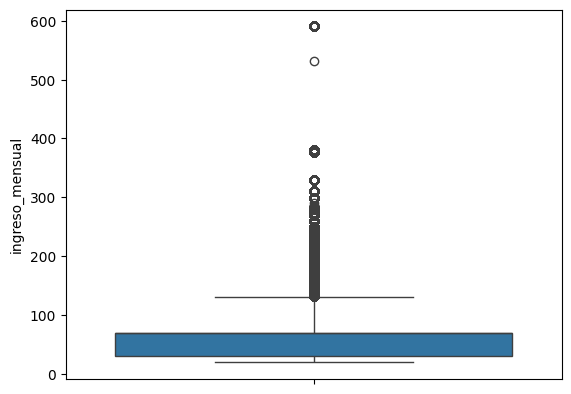

In [45]:
sns.boxplot(df_calls_plan['ingreso_mensual'])
mean_ingresos_ultimate= np.mean(plan_ultimate['ingreso_mensual'])
var_ingresos_ultimate = np.var(plan_ultimate['ingreso_mensual'])
median_ingresos_ultimate= stat.median(plan_ultimate['ingreso_mensual'])
mode_ingresos_ultimate= stat.mode(plan_ultimate['ingreso_mensual'])
dev_ingresos_ultimate= np.sqrt(var_ingresos_ultimate)


mean_ingresos_surf= np.mean(plan_surf['ingreso_mensual'])
var_ingresos_surf= np.var(plan_surf['gb_used'])
median_ingresos_surf= stat.median(plan_surf['gb_used'])
mode_ingresos_surf= stat.mode(plan_surf['gb_used'])
dev_ingresos_surf= np.sqrt(var_internet_surf)


print (mean_ingresos_ultimate, var_ingresos_ultimate, median_ingresos_ultimate, mode_ingresos_ultimate, dev_ingresos_ultimate)
print (mean_ingresos_surf, var_ingresos_surf, median_ingresos_surf, dev_ingresos_surf)

The first thing we can observe is that Ultimate plan users generate a fairly stable income, with no fluctuations like those on the Surf plan. Therefore, our first conclusion is that Surf plan users exceed their monthly spending limits.
Surf plan users have a right-skewed distribution, with a mean below $80. That is, most users who exceed the initial cost of the plan do not consume more than $80. Outliers range from approximately $120 to $600.

Income, especially for the Surf plan, increases over time and is observed to reach a certain stability over the months. However, since it varies depending on additional consumption, it is difficult for it to fully stabilize.

The variance of the Ultimate plan is 76.94, while that of the Surf plan is 55.35. Although the variance of the former is slightly higher, both are relatively close, indicating that the dispersion of monthly revenue is not extremely different between the two plans. However, the standard deviation does suggest that Surf's revenue is more dispersed, due to the variation factors we have already analyzed.

Based on the information provided, we can conclude that the Ultimate plan is more profitable over time, with consistently higher revenue and less variability in its behavior after the initial increase.**

## Test Statistical Hypotheses

Null hypothesis: The incomes are equal.

Alternative hypothesis: The incomes are different.

Alpha value = 5%.


In [46]:
# Test the hypotheses



ingresos_ultimate= df_merged_plans[df_merged_plans['plan']== 'ultimate']['ingreso_mensual']
ingresos_surf= df_merged_plans[df_merged_plans['plan']== 'surf']['ingreso_mensual']

#Levene Test:

p_levene = st.levene(ingresos_ultimate, ingresos_surf)
print (p_levene)
print ('Por el pvalue, las varianzas son diferentes')


alpha= 0.05
prueba_t= st.ttest_ind(ingresos_ultimate, ingresos_surf, equal_var= False)

print()
print ('P value:', prueba_t.pvalue)

if prueba_t.pvalue < alpha:
    print ('We reject the null hypothesis')
else:
    print ('We cannot reject the null hypothesis')


LeveneResult(statistic=405.7401019739099, pvalue=3.070976609395645e-83)
Por el pvalue, las varianzas son diferentes

P value: 1.218411585212325e-15
We reject the null hypothesis


Since we want to test if the incomes per plan are different, we first need to state a null hypothesis, which in other words, is what we want to prove false. In this case, it would be that the incomes are equal.

First, we perform the Levene test, which helps us determine if the variances are equal or different. This is important because the test we will conduct assumes that both variables have the same variance. If they don't, we need to make this known so the calculations can be done correctly.

Then we proceed with the test, considering the previous result, which indicates that the variances are different. This test gives us a very low probability value, which means we can reject the null hypothesis.

Null hypothesis: The average income of users in the NY-NJ area is the same as that of other regions

Alternative hypothesis: The average income of users in the NY-NJ area is different from that of other regions

Alpha value: 5%

In [47]:
ny_nj= df_merged_plans[(df_merged_plans['city'].str.contains('NY-NJ', case=False, na=False))]

other_cities= df_merged_plans[~(df_merged_plans['city'].str.contains('NY-NJ', case=False, na=False))]

alpha= 0.05 

p_levene = st.levene(ny_nj['ingreso_mensual'], other_cities['ingreso_mensual'])
print (p_levene)

t_cities= st.ttest_ind(ny_nj['ingreso_mensual'], other_cities['ingreso_mensual'])

print('P value:', t_cities.pvalue)

if t_cities.pvalue < alpha:
    print ('We reject the null hypothesis')
else:
    print ('We cannot reject the null hypothesis')

LeveneResult(statistic=2.2743213637111053, pvalue=0.13166997048840223)
P value: 0.049745282774075514
We reject the null hypothesis


Before proceeding with the test, a filter is first performed to obtain two variables: one containing only the income from the NY=NJ area and another containing the remaining regions.
Once this is done, the Levene test is performed. In this case, since the variances are less than 0.05, it is determined that the variances are considered equal. The null hypothesis that the incomes in the New York-New Jersey area are equal is tested. We reject this because it is just below our alpha value.

## General Conclusion

The data was generally organized, and the changes to be made were guided by the project statement. Thinking about future operations that might need to be performed, I made changes that would make these operations possible.

While running the filters, I noticed that many users don't use certain parts of their plan, such as messages or data, which may correspond to users with an atypical lifestyle or elderly people. For this reason, the DataFrames were mostly joined using the outer method to prevent these users' information from being discarded from the final analysis.

Regarding usage, some of the differences already described are generally observed between users of one plan and another, but the distributions are similar in all cases.

The majority of revenue comes from users of the Ultimate plan. Furthermore, after analyzing the graphs, it is observed that Surf plan users are the ones who, in a percentage, exceed their usage and end up paying more than the initial plan. Based on this conclusion, Megaline can be recommended to adjust its advertising budget to the Ultimate plan, as it generates more revenue and is also the most convenient option for users to avoid overconsumption.

Regarding the project's main hypothesis, the alternative hypothesis is not rejected, meaning that the revenues for both users are different, while also considering that the revenues of users in the NY-NJ areas are different from those of the rest of the states.